# 1D

tensor([[2080.2583],
        [2080.4642],
        [2083.8703],
        [2081.5105],
        [2079.2429],
        [2080.4486],
        [2080.4662],
        [2080.8679],
        [2081.8681],
        [2081.3764],
        [2081.0918],
        [2082.9264],
        [2081.9153],
        [2081.3407],
        [2080.8879],
        [2081.9625],
        [2081.1356],
        [2080.8731],
        [2080.4060],
        [2079.3765],
        [2081.2147],
        [2080.7363],
        [2080.6447],
        [2081.3938],
        [2080.6535],
        [2080.0809],
        [2080.2127],
        [2080.2777],
        [2081.1444],
        [2079.4213],
        [2080.4483],
        [2081.4887],
        [2083.4779],
        [2082.6402],
        [2082.1741],
        [2081.5016],
        [2081.7387],
        [2081.5898],
        [2081.9967],
        [2080.7270],
        [2081.4156],
        [2081.0404],
        [2081.9973],
        [2082.5023],
        [2079.7176],
        [2081.9907],
        [2081.2231],
        [2081

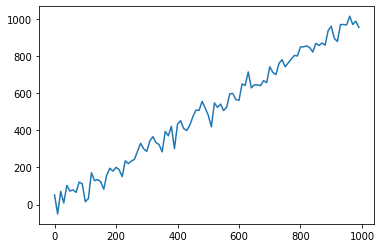

In [1]:
import numpy as np
import torch
from torch import autograd
import matplotlib.pyplot as plt

def loss(predictive_value, true_value):
    print(predictive_value, true_value)
    return torch.mean((predictive_value - true_value) ** 2, dim=0, keepdim=True)

def gradient(W, B, X, Y, learning_rate):
    Y_pre = torch.matmul(W.T, X) + B

    #loss_value = loss(Y_pre, Y)
    grads_W, grads_B = 0, 0

    #grads = autograd.grad(loss_value, [W, B])
    
    N = len(X)
    grads_W += -(2/N) * X * (Y - Y_pre)
    grads_B += -(2/N) * (Y - Y_pre)

    #print(grads[0], grads[1])
    new_w = W - learning_rate * grads_W
    new_b = B - learning_rate * grads_B
    
    return [new_w, new_b]

def init_parameter(n_x, n_y):
    return [torch.randn(n_x, n_y, dtype=float, requires_grad=True), torch.randn(n_x, 1, dtype=float, requires_grad=True)]

X = torch.tensor(np.arange(100).reshape(100, 1) * 10 + np.random.randn(100, 1) * 40 , dtype=float)
Y = torch.tensor(np.arange(100).reshape(100, 1) * 10, dtype=float)
W, B = init_parameter(100, 1)
#W, B = torch.zeros(100, 1, dtype=float), torch.zeros(100, 1, dtype=float)

num_iterations = 500

costs = []

for i in range(num_iterations):
    Y_pre = torch.matmul(W.T, X) + B
    loss_value = loss(Y_pre, Y)
    if(i % 300 == 0):
        print(loss_value)
    costs.append(loss_value)

    W, B = gradient(W, B, X, Y, 0.00001)

Y_pre = torch.matmul(W.T, X) + B
#print(Y_pre.detach().numpy(), Y.detach().numpy())

plt.plot(Y.detach().numpy(), X.detach().numpy())
#print(costs)

#plt.plot(range(num_iterations), costs)
plt.show()



# 2D

In [ ]:
import numpy as np
import torch
from torch import autograd
import matplotlib.pyplot as plt

def f(x):
    return (x-6)**2 + 1

def loss(predictive_value, true_value):
    return torch.mean((predictive_value - true_value) ** 2, dim=0, keepdim=True)

def gradient(W, B, X, Y, loss_function,learning_rate, num_iterations):
    optimizer = torch.optim.Adam([W, B], lr=1e-2)
    loss_monitor = []
    for i in range(num_iterations):
        optimizer.zero_grad()

        Y_pre = torch.matmul(W.T, X) + B
        loss_value = loss_function(Y_pre, Y)
        #grand = autograd.grad(loss_value, [W, B])

        loss_value.backward()
        optimizer.step()

        loss_monitor.append(loss_value)
        print('round{}: loss is {}'.format(i, loss_value))
    
    return [W, B, loss_monitor]

def init_parameter(n_x, n_y):
    return [torch.randn(n_x, n_y, dtype=float, requires_grad=True), torch.randn(n_x, 1, dtype=float, requires_grad=True)]

x = np.arange(-10, 10, 0.1)
y = f(x)
X = torch.tensor(x.reshape(len(x), 1), dtype=float, requires_grad=True)
Y = torch.tensor(y.reshape(len(y), 1), dtype=float, requires_grad=True)
W, B = init_parameter(len(x), 1)

num_iterations = 10000
loss_function = torch.nn.L1Loss()
W, B, loss_monitor = gradient(W, B, X, Y, loss_function, 100, num_iterations)

#print(Y_pre.detach().numpy(), Y.detach().numpy())

plt.plot(range(len(loss_monitor)), loss_monitor)
#print(costs)

#plt.plot(range(num_iterations), costs)
plt.show()

In [ ]:
#f(x, y) = (x^2 + y - 11)**2 + (x + y^2 - 7)**2

import numpy as np
import matplotlib.pyplot as plt
import torch

def f(x, y):
    return ((x**2 + y - 11)**2 + (x + y**2 - 7)**2)



x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)

X, Y = np.meshgrid(x, y)
Z = torch.tensor(f(X, Y))
"""
fig = plt.figure("Himmelblau_Function")
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.show()
"""
x = torch.tensor([0.], requires_grad=True)
y = torch.tensor([0.], requires_grad=True)

optimizer = torch.optim.Adam([x, y], lr=1e-3)

for step in range(20000):
    pre_z = f(x, y)
    optimizer.zero_grad() #loss关于weight的导数变成0.
    pre_z.backward()
    optimizer.step()

    if step % 2000 == 0:
        print("step {}: x = {}, y = {}, f(x, y) = {}".format(step, x.tolist(), y.tolist(), pre_z.item()))